# What are the wordpieces with the biggest and smallest vector norms?

One of the questions that comes up when analyzing visual tokens is the magnitude of the embeddings for the word-pieces.  This notebook shows this explicitly.

In [1]:
import imgtokens
ipwt = imgtokens.ImagePatchWordTokenizer()
ipwt._init_model()
embeds = ipwt.embedding_matrix

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
import torch
norms = torch.norm(embeds, p=2, dim=1)
norms = norms.detach().cpu().numpy()
norms.shape

(32064,)

# Distribution of L2 norms

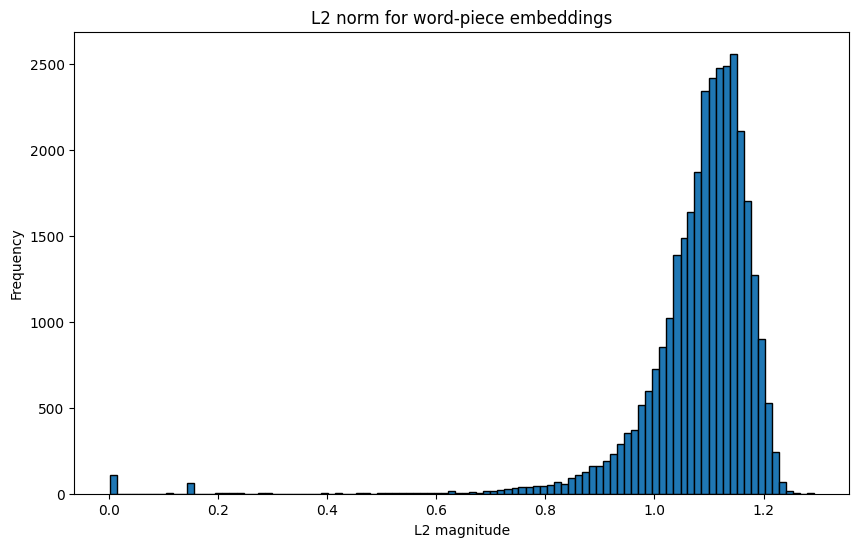

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(norms), bins=100, edgecolor='black')
plt.xlabel('L2 magnitude')
plt.ylabel('Frequency')
plt.title('L2 norm for word-piece embeddings')
plt.show()

# Wordpieces with smallest norms

In [4]:
order = np.argsort(norms)

In [5]:
for n in range(30):
    idx = int(order[n])
    norm = norms[idx]
    word = ipwt.processor.tokenizer.decode(idx)
    print(f"#{n} smallest is {word} ({idx=}) with norm {norm:.5f}")

#0 smallest is % (idx=40) with norm 0.00035
#1 smallest is � (idx=198) with norm 0.00035
#2 smallest is T (idx=87) with norm 0.00035
#3 smallest is g (idx=106) with norm 0.00035
#4 smallest is _ (idx=98) with norm 0.00035
#5 smallest is H (idx=75) with norm 0.00035
#6 smallest is I (idx=76) with norm 0.00035
#7 smallest is K (idx=78) with norm 0.00035
#8 smallest is m (idx=112) with norm 0.00035
#9 smallest is ! (idx=36) with norm 0.00035
#10 smallest is D (idx=71) with norm 0.00036
#11 smallest is 3 (idx=54) with norm 0.00036
#12 smallest is � (idx=257) with norm 0.00036
#13 smallest is 6 (idx=57) with norm 0.00036
#14 smallest is z (idx=125) with norm 0.00036
#15 smallest is 0 (idx=51) with norm 0.00036
#16 smallest is v (idx=121) with norm 0.00036
#17 smallest is E (idx=72) with norm 0.00036
#18 smallest is : (idx=61) with norm 0.00036
#19 smallest is p (idx=115) with norm 0.00036
#20 smallest is = (idx=64) with norm 0.00036
#21 smallest is ; (idx=62) with norm 0.00036
#22 smallest 

# biggest norms

In [6]:
for n in range(1,30):
    idx = int(order[-n])
    norm = norms[idx]
    word = ipwt.processor.tokenizer.decode(idx)
    print(f"#{n} biggest is {word} ({idx=}) with norm {norm:.5f}")

#1 biggest is   (idx=31353) with norm 1.29297
#2 biggest is ￼ (idx=31634) with norm 1.29102
#3 biggest is Santos (idx=24813) with norm 1.26074
#4 biggest is yrus (idx=29646) with norm 1.26074
#5 biggest is Wolfgang (idx=19314) with norm 1.25977
#6 biggest is Bruno (idx=20975) with norm 1.25781
#7 biggest is firewall (idx=25570) with norm 1.25488
#8 biggest is ylvan (idx=13431) with norm 1.25195
#9 biggest is Maryland (idx=22559) with norm 1.25195
#10 biggest is irmingham (idx=28836) with norm 1.25098
#11 biggest is odore (idx=29221) with norm 1.25098
#12 biggest is ignon (idx=29582) with norm 1.25000
#13 biggest is comma (idx=16694) with norm 1.24902
#14 biggest is Ernst (idx=15969) with norm 1.24902
#15 biggest is Queensland (idx=25195) with norm 1.24805
#16 biggest is ancouver (idx=29711) with norm 1.24805
#17 biggest is hagen (idx=25771) with norm 1.24512
#18 biggest is Lyon (idx=22105) with norm 1.24512
#19 biggest is eground (idx=18128) with norm 1.24219
#20 biggest is Congo (idx=

# The ones at the end which cosine likes

In [7]:
for n in range(32000,32063):
    idx = n
    norm = norms[idx]
    word = ipwt.processor.tokenizer.decode(idx)
    print(f"Number {n} is {word} ({idx=}) with norm {norm:.5f}")

Number 32000 is <image> (idx=32000) with norm 0.15161
Number 32001 is  (idx=32001) with norm 0.15125
Number 32002 is  (idx=32002) with norm 0.15149
Number 32003 is  (idx=32003) with norm 0.15149
Number 32004 is  (idx=32004) with norm 0.15161
Number 32005 is  (idx=32005) with norm 0.15161
Number 32006 is  (idx=32006) with norm 0.15149
Number 32007 is  (idx=32007) with norm 0.15149
Number 32008 is  (idx=32008) with norm 0.15125
Number 32009 is  (idx=32009) with norm 0.15149
Number 32010 is  (idx=32010) with norm 0.15137
Number 32011 is  (idx=32011) with norm 0.15137
Number 32012 is  (idx=32012) with norm 0.15137
Number 32013 is  (idx=32013) with norm 0.15149
Number 32014 is  (idx=32014) with norm 0.15149
Number 32015 is  (idx=32015) with norm 0.15173
Number 32016 is  (idx=32016) with norm 0.15149
Number 32017 is  (idx=32017) with norm 0.15137
Number 32018 is  (idx=32018) with norm 0.15161
Number 32019 is  (idx=32019) with norm 0.15149
Number 32020 is  (idx=32020) with norm 0.15137
Number